<a href="https://colab.research.google.com/github/regineialves/time_series/blob/main/Proje%C3%A7%C3%A3o%20com%20Holt-Winters%20-%20Epis%C3%B3dios%20Depressivos%20DataSUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sklearn.model_selection.TimeSeriesSplit()
!pip install -U scikit-learn==0.24.0

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: `pip install sklearn.model_selection.TimeSeriesSplit()'


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error,mean_squared_error

from matplotlib import pyplot as plt
plt.style.use('Solarize_Light2')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/regineialves/time_series/main/numero_casos.csv', sep=';', dtype='int64')
pop_projetada = pd.read_csv('https://raw.githubusercontent.com/regineialves/time_series/main/Populacoes_Projetadas_Mensais_dia_01_ate_2030.csv', sep=';')
df.head()

,DATA,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO,Brasil,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
0,201211,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,2,0,5,0,0,0,4,1
1,201212,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,4,0,7,0,0,0,6,1
2,201301,0,1278,53,0,1199,1338,0,62,509,551,3029,471,685,1259,698,1049,172,3086,757,271,192,1,1312,1358,123,7707,237,27397,1672,6672,1742,11555,5756
3,201302,0,957,109,0,1336,844,11,59,777,570,2250,878,1035,1347,870,767,243,4215,639,231,175,3,953,1298,111,7827,163,27668,2694,5936,1797,10775,6466
4,201303,0,1101,230,0,1794,1484,10,59,1161,544,2951,1061,1111,1873,1023,1032,294,3595,757,260,160,18,1414,1365,82,10149,128,33656,3343,7614,2409,13916,6374


In [4]:
df.drop([0,1], axis=0, inplace=True)

In [5]:
df.dtypes

DATA            int64
AC              int64
AL              int64
AM              int64
AP              int64
BA              int64
CE              int64
DF              int64
ES              int64
GO              int64
MA              int64
MG              int64
MS              int64
MT              int64
PA              int64
PB              int64
PE              int64
PI              int64
PR              int64
RJ              int64
RN              int64
RO              int64
RR              int64
RS              int64
SC              int64
SE              int64
SP              int64
TO              int64
Brasil          int64
Centro-Oeste    int64
Nordeste        int64
Norte           int64
Sudeste         int64
Sul             int64
dtype: object

In [6]:
df['DATA'] = pd.to_datetime(df['DATA'], format='%Y%m', dayfirst=True)

In [7]:
df.set_index('DATA', inplace=True)

In [8]:
df.head()

,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO,Brasil,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
DATA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,1278,53,0,1199,1338,0,62,509,551,3029,471,685,1259,698,1049,172,3086,757,271,192,1,1312,1358,123,7707,237,27397,1672,6672,1742,11555,5756
2013-02-01,0,957,109,0,1336,844,11,59,777,570,2250,878,1035,1347,870,767,243,4215,639,231,175,3,953,1298,111,7827,163,27668,2694,5936,1797,10775,6466
2013-03-01,0,1101,230,0,1794,1484,10,59,1161,544,2951,1061,1111,1873,1023,1032,294,3595,757,260,160,18,1414,1365,82,10149,128,33656,3343,7614,2409,13916,6374
2013-04-01,0,1924,202,0,2006,2087,0,162,1297,909,3070,913,1386,2924,1146,986,382,4138,672,275,344,34,1408,1946,121,11579,215,40126,3596,9836,3719,15483,7492
2013-05-01,0,1515,188,0,1672,1724,17,136,1124,1015,3435,1033,1082,2484,1074,1060,296,4589,822,317,228,0,1494,2105,164,10193,208,37975,3256,8837,3108,14586,8188


In [9]:
pop_projetada.head()

,DATA,Brasil,Norte,Nordeste,Sudeste,Sul,Centro-Oeste,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
0,01/07/2010,194875052,16247841,54229734,82138970,27911930,14346577,1598381,765430,3551217,459844,7765472,693857,1413640,6715260,3193930,8625391,3240375,3840945,9001011,3196933,2108757,14307132,19957386,3595291,16298103,42288190,10650244,6351544,10910142,2493878,3104317,6109715,2638667
1,01/08/2010,195017573,16267657,54255905,82198254,27930974,14364783,1600017,766537,3556859,460248,7773575,695303,1415119,6718546,3194627,8629903,3242977,3842254,9006205,3198340,2110555,14312498,19968902,3599212,16306954,42323187,10657439,6358951,10914584,2496536,3107705,6118387,2642154
2,01/09/2010,195160170,16287491,54282102,82257547,27950035,14382995,1601654,767643,3562499,460676,7781672,696749,1416598,6721836,3195325,8634424,3245578,3843572,9011400,3199746,2112353,14317867,19980421,3603135,16315815,42358175,10664640,6366366,10919029,2499195,3111098,6127059,2645643
3,01/10/2010,195302839,16307345,54308325,82316846,27969111,14401212,1603293,768749,3568137,461128,7789765,698194,1418079,6725128,3196025,8638953,3248178,3844900,9016599,3201150,2114152,14323240,19991945,3607060,16324688,42393154,10671848,6373788,10923476,2501855,3114496,6135729,2649132
4,01/11/2010,195445578,16327217,54334573,82376151,27988203,14419434,1604933,769854,3573774,461604,7797852,699639,1419560,6728424,3196727,8643490,3250775,3846237,9021800,3202552,2115951,14328616,20003471,3610987,16333571,42428122,10679062,6381216,10927925,2504515,3117899,6144397,2652623


In [10]:
pop_projetada.dtypes

DATA                   object
Brasil                  int64
Norte                   int64
Nordeste                int64
Sudeste                 int64
Sul                     int64
Centro-Oeste            int64
Rondônia                int64
Acre                    int64
Amazonas                int64
Roraima                 int64
Pará                    int64
Amapá                   int64
Tocantins               int64
Maranhão                int64
Piauí                   int64
Ceará                   int64
Rio Grande do Norte     int64
Paraíba                 int64
Pernambuco              int64
Alagoas                 int64
Sergipe                 int64
Bahia                   int64
Minas Gerais            int64
Espírito Santo          int64
Rio de Janeiro          int64
São Paulo               int64
Paraná                  int64
Santa Catarina          int64
Rio Grande do Sul       int64
Mato Grosso do Sul      int64
Mato Grosso             int64
Goiás                   int64
Distrito F

In [11]:
pop_projetada['DATA'] = pd.to_datetime(pop_projetada['DATA'], format='%d/%m/%Y', dayfirst=True)
pop_projetada.set_index('DATA', inplace=True)

In [12]:
pop_projetada.head()

,Brasil,Norte,Nordeste,Sudeste,Sul,Centro-Oeste,Rondônia,Acre,Amazonas,Roraima,Pará,Amapá,Tocantins,Maranhão,Piauí,Ceará,Rio Grande do Norte,Paraíba,Pernambuco,Alagoas,Sergipe,Bahia,Minas Gerais,Espírito Santo,Rio de Janeiro,São Paulo,Paraná,Santa Catarina,Rio Grande do Sul,Mato Grosso do Sul,Mato Grosso,Goiás,Distrito Federal
DATA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-07-01,194875052,16247841,54229734,82138970,27911930,14346577,1598381,765430,3551217,459844,7765472,693857,1413640,6715260,3193930,8625391,3240375,3840945,9001011,3196933,2108757,14307132,19957386,3595291,16298103,42288190,10650244,6351544,10910142,2493878,3104317,6109715,2638667
2010-08-01,195017573,16267657,54255905,82198254,27930974,14364783,1600017,766537,3556859,460248,7773575,695303,1415119,6718546,3194627,8629903,3242977,3842254,9006205,3198340,2110555,14312498,19968902,3599212,16306954,42323187,10657439,6358951,10914584,2496536,3107705,6118387,2642154
2010-09-01,195160170,16287491,54282102,82257547,27950035,14382995,1601654,767643,3562499,460676,7781672,696749,1416598,6721836,3195325,8634424,3245578,3843572,9011400,3199746,2112353,14317867,19980421,3603135,16315815,42358175,10664640,6366366,10919029,2499195,3111098,6127059,2645643
2010-10-01,195302839,16307345,54308325,82316846,27969111,14401212,1603293,768749,3568137,461128,7789765,698194,1418079,6725128,3196025,8638953,3248178,3844900,9016599,3201150,2114152,14323240,19991945,3607060,16324688,42393154,10671848,6373788,10923476,2501855,3114496,6135729,2649132
2010-11-01,195445578,16327217,54334573,82376151,27988203,14419434,1604933,769854,3573774,461604,7797852,699639,1419560,6728424,3196727,8643490,3250775,3846237,9021800,3202552,2115951,14328616,20003471,3610987,16333571,42428122,10679062,6381216,10927925,2504515,3117899,6144397,2652623


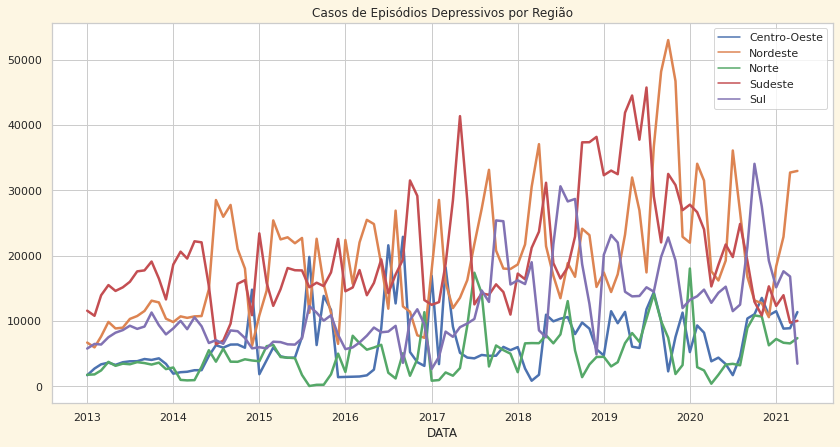

In [13]:
plt.figure(figsize=(14,7))
sns.set_theme(style="whitegrid")
sns.color_palette("Set2")

sns.lineplot(data=df.iloc[:,-5:], linewidth=2.5, dashes=False)

plt.title("Casos de Episódios Depressivos por Região")
plt.show()

In [14]:
casos_populacao = pd.concat([pop_projetada.iloc[30:130,:6], df.iloc[:,-6:]], axis=1)
casos_populacao.head()

,Brasil,Norte,Nordeste,Sudeste,Sul,Centro-Oeste,Brasil,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
DATA,,,,,,,,,,,,
2013-01-01,199172070,16849225,55023625,83916508,28488495,14894217,27397,1672,6672,1742,11555,5756
2013-02-01,199315629,16869462,55050298,83975554,28507831,14912484,27668,2694,5936,1797,10775,6466
2013-03-01,199459179,16889707,55076977,84034574,28527170,14930750,33656,3343,7614,2409,13916,6374
2013-04-01,199602716,16909961,55103662,84093569,28546511,14949013,40126,3596,9836,3719,15483,7492
2013-05-01,199746239,16930222,55130352,84152536,28565854,14967275,37975,3256,8837,3108,14586,8188


In [15]:
qtde_relativa_habitantes = 100000
casos_relativo = pd.concat([casos_populacao.iloc[:,6:7]/casos_populacao.iloc[:,:1]*qtde_relativa_habitantes,
                            casos_populacao.iloc[:,7:8]/casos_populacao.iloc[:,5:6]*qtde_relativa_habitantes,
                            casos_populacao.iloc[:,8:9]/casos_populacao.iloc[:,2:3]*qtde_relativa_habitantes,
                            casos_populacao.iloc[:,9:10]/casos_populacao.iloc[:,1:2]*qtde_relativa_habitantes,
                            casos_populacao.iloc[:,10:11]/casos_populacao.iloc[:,3:4]*qtde_relativa_habitantes,
                            casos_populacao.iloc[:,11:12]/casos_populacao.iloc[:,4:5]*qtde_relativa_habitantes],
                           axis=1)

In [16]:
casos_relativo.head()

,Brasil,Centro-Oeste,Nordeste,Norte,Sudeste,Sul
DATA,,,,,,
2013-01-01,13.755443,11.225833,12.125701,10.338754,13.769639,20.204648
2013-02-01,13.881500,18.065401,10.782866,10.652385,12.831115,22.681487
2013-03-01,16.873628,22.390034,13.824288,14.263125,16.559851,22.343611
2013-04-01,20.102933,24.055100,17.849993,21.992954,18.411634,26.244889
2013-05-01,19.011622,21.754127,16.029283,18.357704,17.332811,28.663593


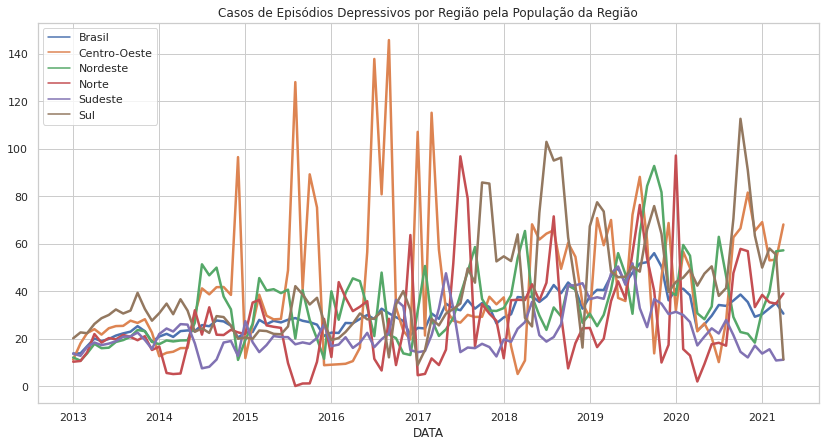

In [17]:
plt.figure(figsize=(14,7))
sns.set_theme(style="whitegrid")
sns.color_palette("Set2")

sns.lineplot(data=casos_relativo, linewidth=2.5, dashes=False)
plt.title("Casos de Episódios Depressivos por Região pela População da Região")
plt.show()

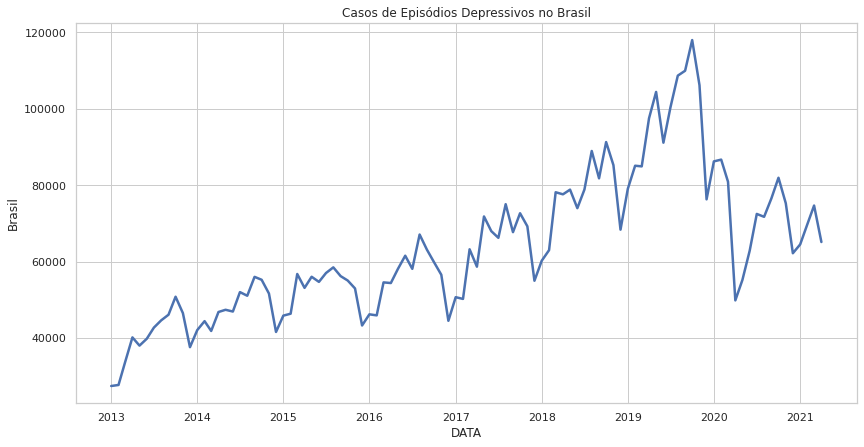

In [18]:
plt.figure(figsize=(14,7))
sns.lineplot(data=df.Brasil, linewidth=2.5)

plt.title("Casos de Episódios Depressivos no Brasil")
plt.show()

### Time Series

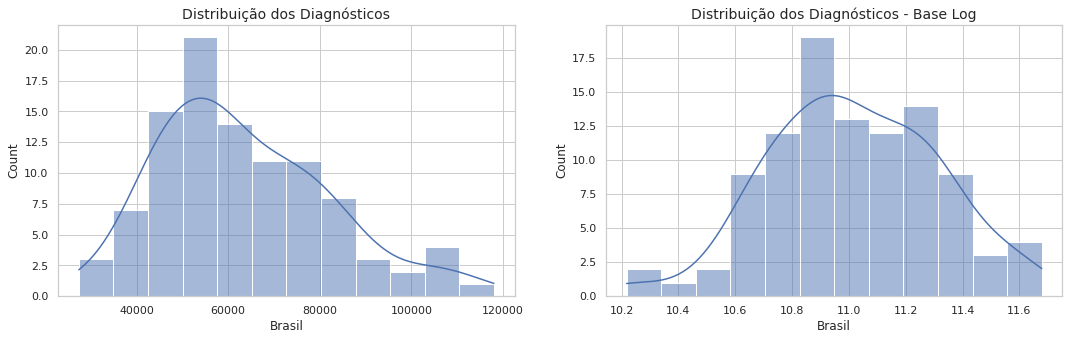

In [19]:
plt.figure(figsize = (18, 5))

plt.subplot(1, 2, 1)
sns.histplot(df.Brasil, kde=True, bins=12)
plt.title('Distribuição dos Diagnósticos', fontsize=14)

plt.subplot(1, 2, 2)
sns.histplot(np.log(df.Brasil), kde=True, bins=12)
plt.title('Distribuição dos Diagnósticos - Base Log', fontsize=14)

plt.show()

In [20]:
# Hipóteses:
# H0: tem raíz unitária (não é estacionária)
# H1: não tem raíz unitária (é estacionária)

In [21]:
result = adfuller(df.Brasil)
result_log = adfuller(np.log(df.Brasil))

print('Teste ADF em nível: \t| Teste ADF em Log:')
print('\t%.3f \t\t|\t%.3f' % (result[0], result_log[0]))
print('-----------------------------------------------')
print('p-value em nível: \t| p-value em Log:')
print('\t%.3f \t\t|\t%.3f' % (result[1], result_log[1]))
print('\nLags utilizada em nível: %.f, em Log: %.f' % (result[2], result_log[2]))
print('Observações utilizadas em nível: %.f, em Log: %.f' % (result[3], result_log[3]))

print('\nValores Críticos em nível:')
for nivel, valor in result[4].items():
    print('\t%s: %.3f' % (nivel, valor))

print('\nValores Críticos em log:')
for nivel, valor in result_log[4].items():
    print('\t%s: %.3f' % (nivel, valor))

Teste ADF em nível: 	| Teste ADF em Log:
	-1.497 		|	-1.404
-----------------------------------------------
p-value em nível: 	| p-value em Log:
	0.535 		|	0.581

Lags utilizada em nível: 12, em Log: 12
Observações utilizadas em nível: 87, em Log: 87

Valores Críticos em nível:
	1%: -3.508
	5%: -2.895
	10%: -2.585

Valores Críticos em log:
	1%: -3.508
	5%: -2.895
	10%: -2.585


In [22]:
# Como p-value > 0.05, não rejeita-se a hipótese nula - a série é não estacionária

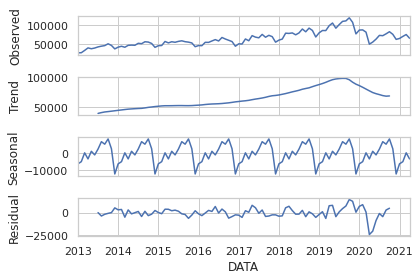

In [23]:
sm.tsa.seasonal_decompose(df.Brasil, model='additive').plot()
plt.show()

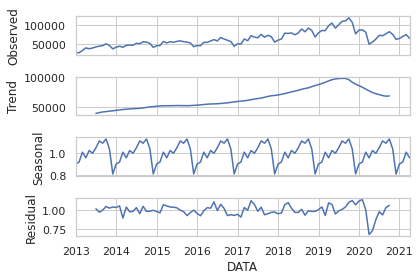

In [24]:
sm.tsa.seasonal_decompose(df.Brasil, model='multiplicative').plot()
plt.show()

In [25]:
df.Brasil.index.freq = 'MS' # frequência de dados mensal
m = 12 # período
alpha = 1/(2*m)

In [26]:
df.Brasil

DATA
2013-01-01    27397
2013-02-01    27668
2013-03-01    33656
2013-04-01    40126
2013-05-01    37975
              ...  
2020-12-01    62166
2021-01-01    64474
2021-02-01    69853
2021-03-01    74652
2021-04-01    65107
Freq: MS, Name: Brasil, Length: 100, dtype: int64

In [27]:
df['HWES2_add'] = ExponentialSmoothing(df.Brasil, trend='add').fit().fittedvalues
df['HWES2_mul'] = ExponentialSmoothing(df.Brasil, trend='mul').fit().fittedvalues

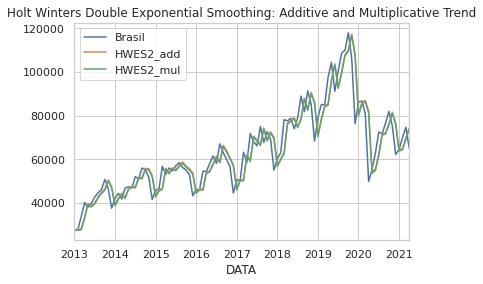

In [28]:
df[['Brasil', 'HWES2_add', 'HWES2_mul']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend')
plt.show()

In [29]:
# Como sabemos que existe sazonalidade, faremos uso da suavização exponencial tripla

In [30]:
df['HWES3_add'] = ExponentialSmoothing(df.Brasil, trend='add', seasonal='add',seasonal_periods=12).fit().fittedvalues
df['HWES3_mul'] = ExponentialSmoothing(df.Brasil, trend='mul', seasonal='mul',seasonal_periods=12).fit().fittedvalues

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


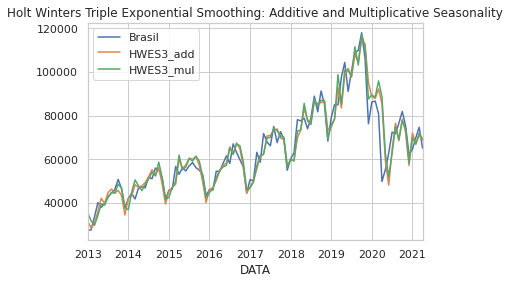

In [31]:
df[['Brasil', 'HWES3_add', 'HWES3_mul']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality')
plt.show()

# Começando a Projeção

In [32]:
X = df.Brasil.index
y = df.Brasil.values

In [33]:
tscv = TimeSeriesSplit()
print(tscv)

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None)


In [34]:
tscv = TimeSeriesSplit(n_splits=2, test_size=30)

In [35]:
for train_index, test_index in tscv.split(X):
  print("\nTrain:", train_index, "\nTest:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]


Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39] 
Test: [40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63
 64 65 66 67 68 69]

Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69] 
Test: [70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93
 94 95 96 97 98 99]


In [36]:
# O tamanho da amostra de teste definido está se mantendo os últimos meses, que é o mesmo que:
train = df.Brasil[:-30]
test = df.Brasil[70:]

In [37]:
# Utilizando o modelo como multiplicativo
forecast_model = ExponentialSmoothing(train,trend='mul',seasonal='mul',seasonal_periods=12).fit()

In [38]:
# Os meses equivalentes ao teste e mais 12 meses
test_predictions = forecast_model.forecast(42)

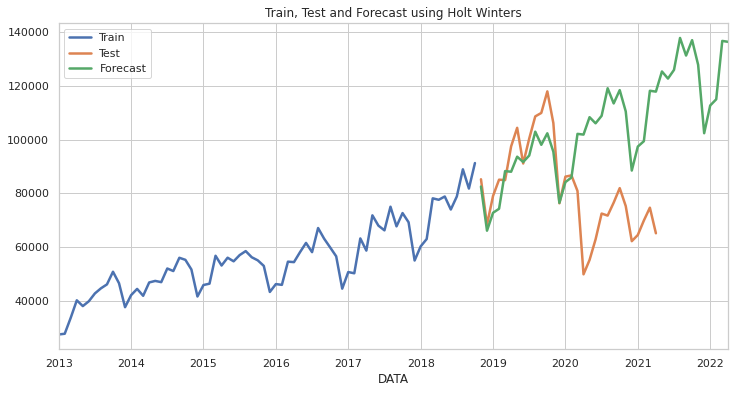

In [39]:
train.plot(legend=True,label='Train', linewidth=2.5)
test.plot(legend=True,label='Test',figsize=(12, 6), linewidth=2.5)
test_predictions.plot(legend=True,label='Forecast', linewidth=2.5)
plt.title('Train, Test and Forecast using Holt Winters')
plt.show()

In [40]:
print(f'Mean Absolute Error = {mean_absolute_error(test, test_predictions[:30])}')
print(f'Mean Squared Error = {mean_squared_error(test, test_predictions[:30])}')

Mean Absolute Error = 21569.21460231924
Mean Squared Error = 789650490.975435


In [41]:
# Utilizando o modelo como aditivo
forecast_model_add = ExponentialSmoothing(train,trend='add',seasonal='add',seasonal_periods=12).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [42]:
test_predictions_add = forecast_model_add.forecast(42)

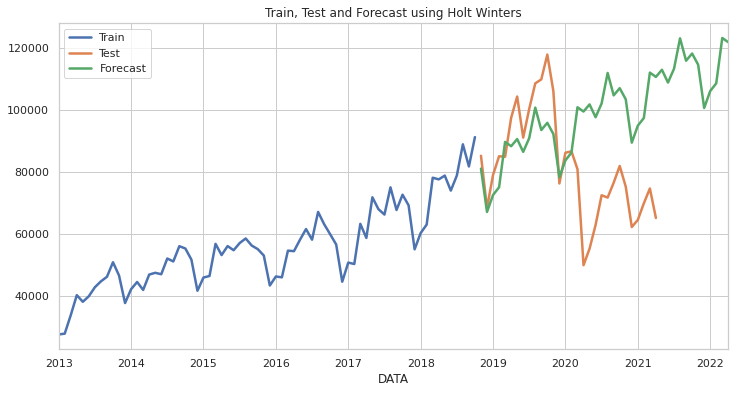

In [43]:
train.plot(legend=True,label='Train', linewidth=2.5)
test.plot(legend=True,label='Test',figsize=(12, 6), linewidth=2.5)
test_predictions_add.plot(legend=True,label='Forecast', linewidth=2.5)
plt.title('Train, Test and Forecast using Holt Winters')
plt.show()

In [44]:
print(f'Mean Absolute Error = {mean_absolute_error(test, test_predictions_add[:30])}')
print(f'Mean Squared Error = {mean_squared_error(test, test_predictions_add[:30])}')

Mean Absolute Error = 20019.702274571417
Mean Squared Error = 617760975.1932908


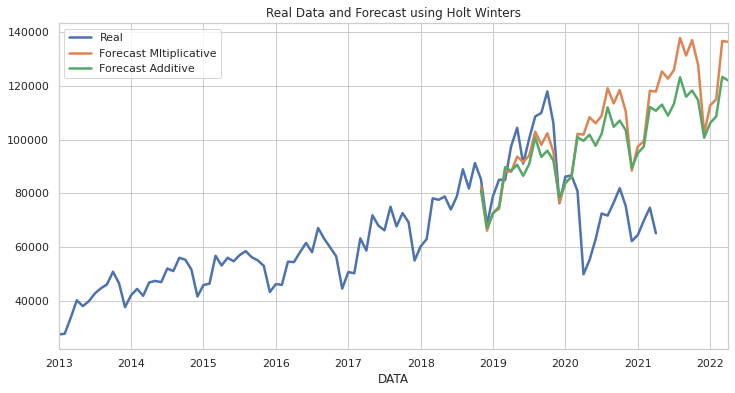

In [45]:
df.Brasil.plot(legend=True,label='Real', figsize=(12, 6), linewidth=2.5)
test_predictions.plot(legend=True,label='Forecast Mltiplicative', linewidth=2.5)
test_predictions_add.plot(legend=True,label='Forecast Additive', linewidth=2.5)
plt.title('Real Data and Forecast using Holt Winters')
plt.show()

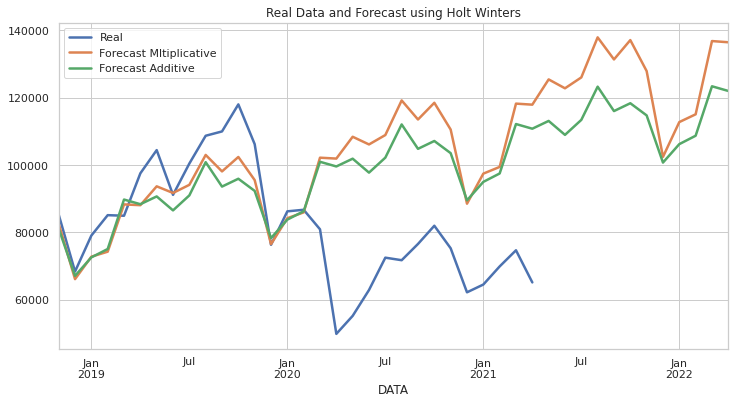

In [46]:
df.Brasil[70:].plot(legend=True,label='Real', figsize=(12, 6), linewidth=2.5)
test_predictions.plot(legend=True,label='Forecast Mltiplicative', linewidth=2.5)
test_predictions_add.plot(legend=True,label='Forecast Additive', linewidth=2.5)
plt.title('Real Data and Forecast using Holt Winters')
plt.show()